<a href="https://colab.research.google.com/github/sightes/COFFETALKS/blob/main/Clase_19_Coderhouse_DS_Caso_Estudio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Caso de Estudio  02**

*   Se entrega el siguiente set de datos de una empresa del sector de telecomunicaciones, TelcoCustomerChurn.csv, el cual es un dataset que cuenta con las principales características de una empresa del sector de telecomunicaciones respecto a sus campañas, facturación y vínculo con el cliente.



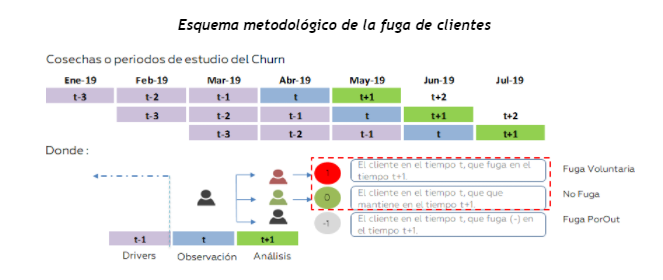

*   La empresa en el último mes y debido a la coyuntura del COVID – 19 ha incrementado su ratio de churn de clientes, pasando de 2% en promedio de los últimos 6 meses a 2.5% en los últimos 6 siguientes. Como sabemos el costo de adquisición de un nuevo cliente es aproximadamente 6 a 7 veces mayor que retener uno que ya tenemos.

*   ¿Cómo puede la institución de telecomunicaciones tener una mayor efectividad para identificar a los clientes propensos a la fuga?

*   Para responder a esto, tenemos que analizar la información de toda la facturación y vínculo que tiene la institución o empresa con los clientes para identificar los patrones que nos ayudarán a encontrar conclusiones para desarrollar estrategias futuras. La empresa necesita saber dimensionar y bajar el ratio de fuga futuro de los clientes.

 Las variables que se disponibilizan son:

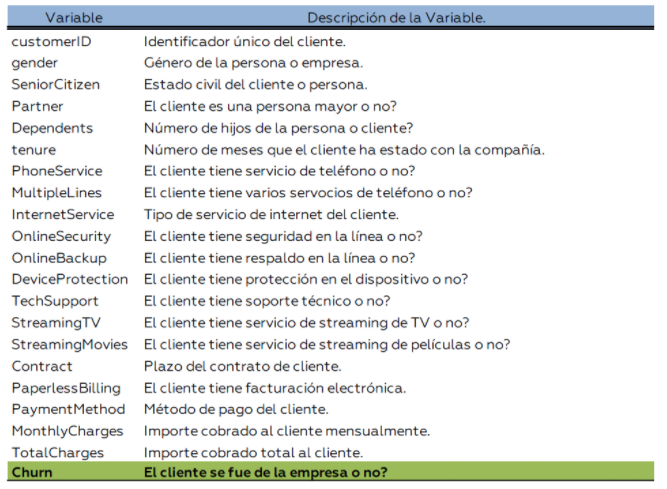


# Kaggle: https://www.kaggle.com/blastchar/telco-customer-churn



In [ ]:
#DESCARGAMOS EL ARCHIVO
!wget "https://drive.google.com/u/2/uc?id=1Zy5Qm7Hq1TAGpmEsSRa2aD1IyNkdXXBi&export=download" -O TelcoCustomerChurn.csv


--2022-01-18 03:00:58--  https://drive.google.com/u/2/uc?id=1Zy5Qm7Hq1TAGpmEsSRa2aD1IyNkdXXBi&export=download
Resolving drive.google.com (drive.google.com)... 74.125.195.102, 74.125.195.139, 74.125.195.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qinlrc0f1j49inussm37ompcn42ksa24/1642474800000/18340134811011616317/*/1Zy5Qm7Hq1TAGpmEsSRa2aD1IyNkdXXBi?e=download [following]
--2022-01-18 03:00:59--  https://doc-00-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qinlrc0f1j49inussm37ompcn42ksa24/1642474800000/18340134811011616317/*/1Zy5Qm7Hq1TAGpmEsSRa2aD1IyNkdXXBi?e=download
Resolving doc-00-30-docs.googleusercontent.com (doc-00-30-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-00-30-docs.googleusercontent.com (do

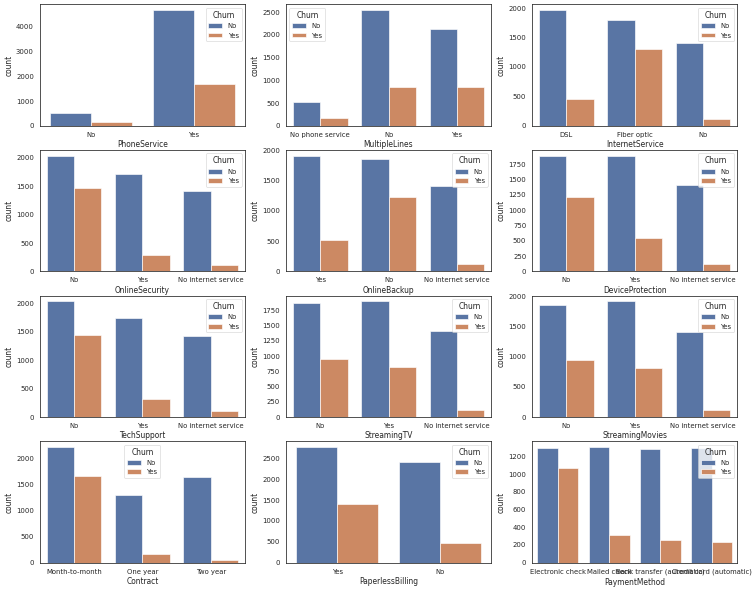

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, RandomOverSampler

#LECTURA DATA
df=pd.read_csv('TelcoCustomerChurn.csv',sep=',')

#TAMANIO IMAGEN
plt.rcParams["figure.figsize"] = (20,25)
plt.rcParams['figure.dpi'] = 45

#ANALISIS PREVIO FEATURES

columns = {'PhoneService':1, 'MultipleLines':2, 'InternetService':3, 'OnlineSecurity':4, 'OnlineBackup':5, 'DeviceProtection':6,
          'TechSupport':7, 'StreamingTV':8, 'StreamingMovies':9, 'Contract':10, 'PaperlessBilling':11, 'PaymentMethod':12}
for key, value in columns.items():
    plt.subplot(6, 3, value)
    sns.countplot(x=key, hue='Churn', data=df)

In [ ]:
#CAMBIO VARIABLES BINARIAS
df.drop('customerID', axis=1, inplace=True)
df['Churn'].replace(to_replace ='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace = 'No', value=0, inplace=True)
df = pd.get_dummies(df)

#ESCALAMIENTO
X = df.drop(columns = ['Churn'])
y = df['Churn'].values
Scaler = StandardScaler()
X = Scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#OPCIONAL OVERSAMPLING
#randOverSample = RandomOverSampler(random_state=100,)
#X_train, y_train = randOverSample.fit_resample(X_train, y_train.ravel())

def apply_model(model1):
    model = model1
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = cross_val_score(model, X_train, y_train, cv = 6)
    precision = precision_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print ('Train score of '+str(model1)[:-2]+' is', score.mean(),'%')
    print ('Precision score is ', precision)
    #print ('ROC Score is', roc)
    #print ('Recall Score is ', recall)
    print ('Confusion Matrix\n\n', cm)

print('Resultado Regresion logistica')
apply_model(LogisticRegression())
print('--')
print('Resultado Random Forest')
apply_model(RandomForestClassifier())

Resultado Regresion logistica
Train score of LogisticRegression is 0.7669506567270146 %
Precision score is  0.5842696629213483
Confusion Matrix

 [[888 148]
 [165 208]]
--
Resultado Random Forest
Train score of RandomForestClassifier is 0.7836350727724529 %
Precision score is  0.6779026217228464
Confusion Matrix

 [[950  86]
 [192 181]]
